Задание 1. Масштабирование:
а. Нормализовать признак - median_income
б. Привести признак - population к масштабу от 0 до 100

In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [21]:
HOUSING_PATH = "data/housing.csv"
housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


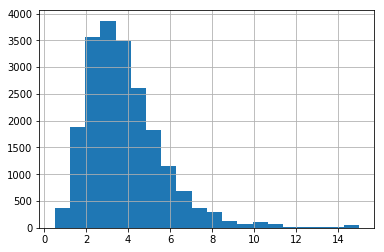

In [10]:
housing["median_income"].hist(bins=20);

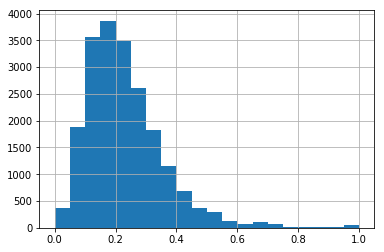

In [29]:
# a. Нормализовать признак - median_income
scaler = preprocessing.MinMaxScaler()
housing['median_income_norm'] = scaler.fit_transform(housing[['median_income']])
housing['median_income_norm'].hist(bins=20)

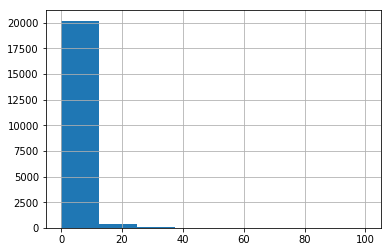

In [37]:
# б. Привести признак - population к масштабу от 0 до 100
scaler_population = preprocessing.MinMaxScaler(feature_range=[0,100])
housing['population_0_100'] = scaler_population.fit_transform(housing[['population']])
housing['population_0_100'].hist(bins=8)

2. Заполнение пропусков:
а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity
Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории


In [52]:
housing.groupby('ocean_proximity')['total_bedrooms'].mean()

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

In [53]:
housing['total_bedrooms_2']= housing.groupby("ocean_proximity")['total_bedrooms'].transform(lambda x: x.fillna(x.mean()))
housing[housing['total_bedrooms'].isna()].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm,population_0_100,total_bedrooms_2
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,0.267245,1.589170,514.182819
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,0.077220,2.043219,514.182819
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,0.143191,10.476751,514.182819
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,0.306823,1.067855,514.182819
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,0.234921,1.076263,514.182819
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY,0.296092,4.574119,514.182819
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND,0.290486,4.770313,533.881619
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND,0.246672,8.980072,533.881619
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND,0.217245,3.971524,533.881619
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY,0.428008,3.744500,514.182819


Задание 3. Категорийные атрибуты:
а. Посчитать среднее кол-во комнат в строке (total_rooms/households)
б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [58]:
# а. Посчитать среднее кол-во комнат в строке (total_rooms/households)
housing['rooms_per_households'] = round(housing['total_rooms']/housing['households'])
housing['rooms_per_households'].describe()

count    20640.000000
mean         5.424806
std          2.491940
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max        142.000000
Name: rooms_per_households, dtype: float64

In [67]:
# б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)
labels = ['1 комната','2 комнаты','3 комнаты','4 комнаты','больше 5ти комнат']
bins = [0,1,2,3,4,1000]
housing['avg_rooms_cat'] = pd.cut(housing['rooms_per_households'], bins=bins, labels=labels)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm,population_0_100,total_bedrooms_2,rooms_per_households,avg_rooms_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.539668,0.894083,129.0,7.0,больше 5ти комнат
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.538027,6.721040,1106.0,6.0,больше 5ти комнат
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.466028,1.381765,190.0,8.0,больше 5ти комнат
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.354699,1.555537,235.0,6.0,больше 5ти комнат
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.230776,1.575156,280.0,6.0,больше 5ти комнат
